In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Option 1: Use a raw string
data_path = r"C:\Users\user\Downloads\AIDI 1100\data.csv"

# Option 2: Use forward slashes
# data_path = "C:/Users/user/Downloads/AIDI 1100/data.csv"


# data_path = "C:\\Users\\user\\Downloads\\AIDI 1100\\data.csv"

data = pd.read_csv(data_path)

# Normalize column names
data.columns = data.columns.str.strip()

# Check the shape of the dataset
print(data.shape)


(6819, 96)


In [8]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [11]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [12]:
data['Bankrupt?'].isna().sum()

0

In [13]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')  # Ensure 'data.csv' is in the correct path

# Check for missing values
missing_data = data.isnull().sum().sort_values(ascending=False).reset_index()
missing_data.columns = ['Feature', 'Missing Values']

print("Missing Values Analysis:")
print(missing_data)


Missing Values Analysis:
                                              Feature  Missing Values
0                                           Bankrupt?               0
1    ROA(C) before interest and depreciation befor...               0
2                                Total expense/Assets               0
3                          Total income/Total expense               0
4                   Retained Earnings to Total Assets               0
..                                                ...             ...
91                            Total Asset Growth Rate               0
92                  Continuous Net Profit Growth Rate               0
93                     Regular Net Profit Growth Rate               0
94                   After-tax Net Profit Growth Rate               0
95                                Equity to Liability               0

[96 rows x 2 columns]


In [7]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()

print("Duplicate Rows Analysis:")
print(f"Total Duplicate Rows: {duplicate_count}")


Duplicate Rows Analysis:
Total Duplicate Rows: 0


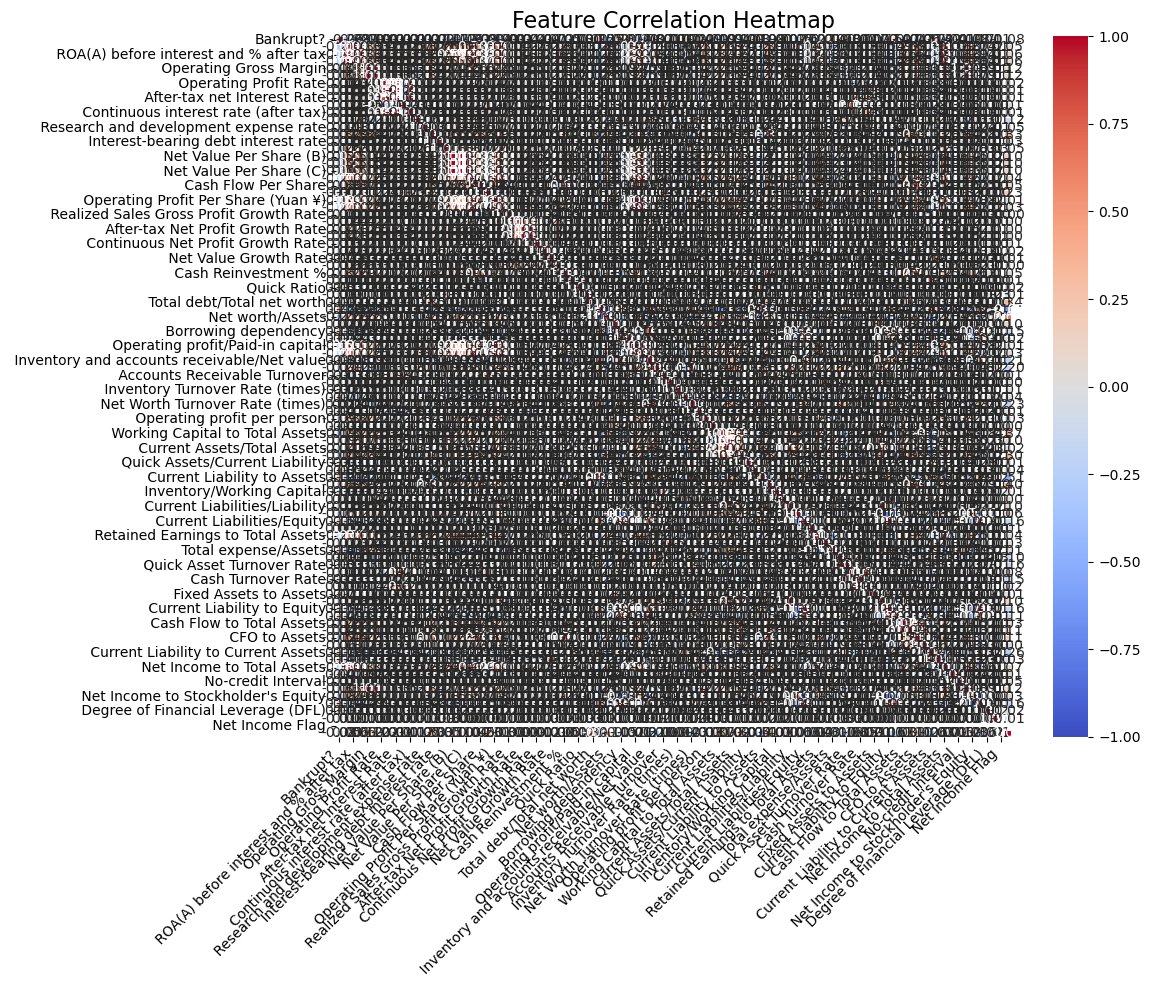

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size
correlation = data.corr()

# Displaying only strong correlations for clarity
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


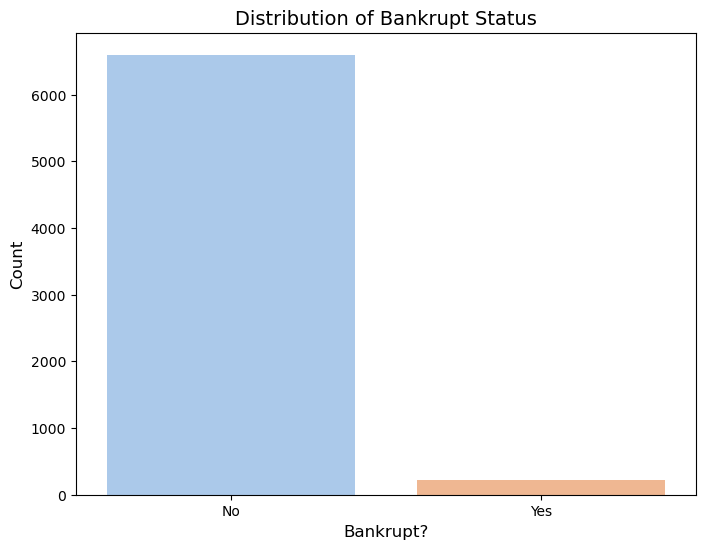

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Bankrupt?', palette='pastel')  # Added palette for aesthetic
plt.title("Distribution of Bankrupt Status", fontsize=14)  # More descriptive title
plt.xlabel("Bankrupt?", fontsize=12)  # Label for x-axis
plt.ylabel("Count", fontsize=12)  # Label for y-axis
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])  # Customize labels for better interpretation
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_3988\2521496207.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()  # Adjust layout for better spacing


<Figure size 2500x2000 with 0 Axes>

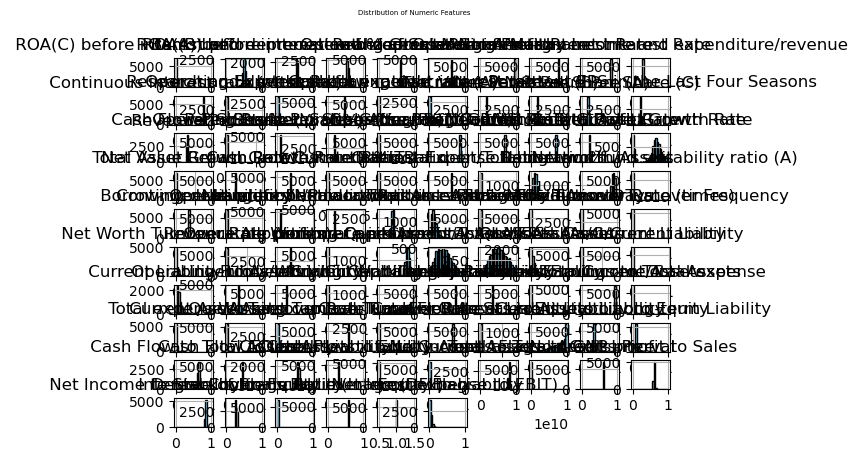

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
data_path = r"C:\Users\user\Downloads\AIDI 1100\data.csv"
data = pd.read_csv(data_path)


# Identify numeric columns in the dataset
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numeric features
plt.figure(figsize=(25, 20))  # Set figure size
data[numeric_cols].hist(bins=25, color='skyblue', edgecolor='black')  # Add color and edges for better visuals
plt.suptitle("Distribution of Numeric Features", fontsize=5)  # Add a descriptive title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the histograms


In [12]:
# Identify highly correlated features
correlation_matrix = data.corr()
correlation_threshold = 0.9  # Define the correlation threshold
high_corr_pairs = []

# Find feature pairs with high correlation
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > correlation_threshold:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.index[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

# Convert the result to a DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs)

print(f"Highly Correlated Feature Pairs (Threshold > {correlation_threshold}):")
print(high_corr_df)


Highly Correlated Feature Pairs (Threshold > 0.9):
                                            Feature 1  \
0    ROA(C) before interest and depreciation befor...   
1    ROA(C) before interest and depreciation befor...   
2              ROA(A) before interest and % after tax   
3              ROA(A) before interest and % after tax   
4    ROA(B) before interest and depreciation after...   
5                              Operating Gross Margin   
6                              Operating Gross Margin   
7                         Realized Sales Gross Margin   
8                               Operating Profit Rate   
9                               Operating Profit Rate   
10                          Pre-tax net Interest Rate   
11                          Pre-tax net Interest Rate   
12                        After-tax net Interest Rate   
13                            Net Value Per Share (B)   
14                            Net Value Per Share (B)   
15                            Net Val

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Sort and display top features by VIF
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

print("Top 10 Features with Highest VIF (Potential Multicollinearity):")
print(vif_data_sorted.head(10))


Top 10 Features with Highest VIF (Potential Multicollinearity):
                             Feature           VIF
77    Current Liability to Liability  5.617913e+11
64     Current Liabilities/Liability  5.071050e+11
54   Working Capital to Total Assets  3.179015e+10
37                      Debt ratio %  1.771104e+10
60       Current Liability to Assets  1.337878e+10
78       Current Liability to Equity  1.009068e+10
56       Current Assets/Total Assets  8.293792e+09
66        Current Liabilities/Equity  7.789855e+09
38                  Net worth/Assets  5.858333e+09
6              Operating Profit Rate  1.052461e+08


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Explained Variance Ratio: [0.13304217 0.07144656 0.04983678 0.04674792 0.04190143]


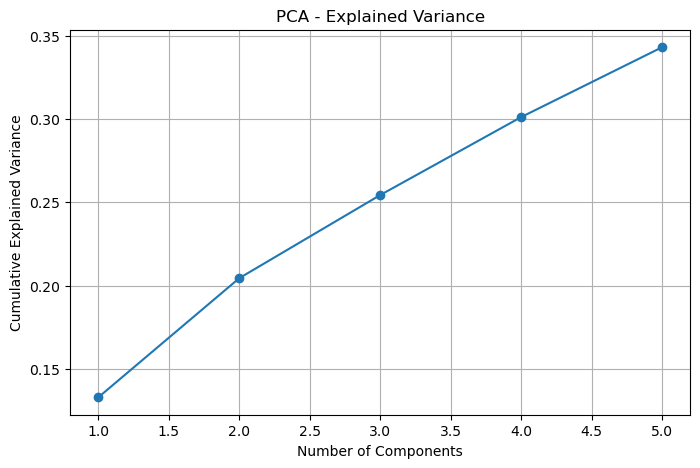

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Standardize the numeric features
def standardize_features(data, numeric_columns):
    """
    Standardizes numeric features using StandardScaler.
    Args:
        data (DataFrame): The input dataset.
        numeric_columns (list): List of numeric column names to standardize.
    Returns:
        scaled_data (ndarray): Scaled numeric data.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numeric_columns].dropna(axis=1))
    return scaled_data, scaler

# Perform PCA
def perform_pca(scaled_data, n_components=5):
    """
    Performs PCA on standardized data.
    Args:
        scaled_data (ndarray): Standardized numeric data.
        n_components (int): Number of PCA components to keep.
    Returns:
        pca_results (ndarray): Transformed data after PCA.
        pca (PCA): PCA object with results.
    """
    pca = PCA(n_components=n_components)
    pca_results = pca.fit_transform(scaled_data)
    return pca_results, pca

# Plot explained variance ratio
def plot_explained_variance(pca):
    """
    Plots the cumulative explained variance for PCA components.
    Args:
        pca (PCA): PCA object with fitted data.
    """
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("PCA - Explained Variance")
    plt.grid(True)
    plt.show()

# Example usage
numeric_cols = [col for col in data.columns if data[col].dtype in [np.float64, np.int64]]  # Define numeric columns
scaled_data, scaler = standardize_features(data, numeric_cols)  # Standardize features
pca_results, pca = perform_pca(scaled_data, n_components=5)  # Perform PCA

# Output explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the explained variance
plot_explained_variance(pca)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


In [16]:
from sklearn.model_selection import train_test_split

# Parameters
target_column = 'Bankrupt?'
test_size = 0.2
out_of_sample_size = 0.2
random_state = 42

# Split data into Out-of-Sample and Remaining Data
def split_out_of_sample(data, target_column, out_of_sample_size, random_state):
    """
    Splits the dataset into an out-of-sample dataset and remaining data.
    Args:
        data (DataFrame): The input dataset.
        target_column (str): The name of the target column.
        out_of_sample_size (float): Fraction of data to reserve as out-of-sample.
        random_state (int): Random state for reproducibility.
    Returns:
        remaining_data (DataFrame): Remaining data after splitting out-of-sample.
        out_of_sample (DataFrame): Data reserved for out-of-sample testing.
    """
    remaining_data, out_of_sample = train_test_split(
        data, 
        test_size=out_of_sample_size, 
        random_state=random_state, 
        stratify=data[target_column]
    )
    return remaining_data, out_of_sample

# Split remaining data into Train and Test sets
def split_train_test(data, target_column, test_size, random_state):
    """
    Splits the remaining dataset into train and test sets.
    Args:
        data (DataFrame): The input dataset.
        target_column (str): The name of the target column.
        test_size (float): Fraction of data to reserve as test set.
        random_state (int): Random state for reproducibility.
    Returns:
        train_data (DataFrame): Training dataset.
        test_data (DataFrame): Testing dataset.
    """
    train_data, test_data = train_test_split(
        data, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=data[target_column]
    )
    return train_data, test_data

# Perform the splits
remaining_data, out_of_sample = split_out_of_sample(data, target_column, out_of_sample_size, random_state)
train_data, test_data = split_train_test(remaining_data, target_column, test_size, random_state)

# Output the sizes of the splits
print(f"Out-of-Sample Size: {out_of_sample.shape}")
print(f"Training Set Size: {train_data.shape}")
print(f"Testing Set Size: {test_data.shape}")


Out-of-Sample Size: (1364, 96)
Training Set Size: (4364, 96)
Testing Set Size: (1091, 96)


In [17]:
# Function to display split sizes and target distributions
def validate_splits(train_data, test_data, out_of_sample, target_column):
    """
    Validates the splits by displaying sizes and target distribution for each dataset.
    Args:
        train_data (DataFrame): Training dataset.
        test_data (DataFrame): Testing dataset.
        out_of_sample (DataFrame): Out-of-sample dataset.
        target_column (str): Name of the target column.
    Returns:
        psi_summary (dict): Summary of split sizes and target class distributions.
    """
    def get_distribution(data, name):
        size = data.shape[0]
        class_distribution = data[target_column].value_counts(normalize=True).to_dict()
        print(f"\n{name} Set Size: {size}")
        print(f"Class Distribution:\n{class_distribution}")
        return {"Size": size, "Class Distribution": class_distribution}

    print("\n--- Split Validation ---")
    training_summary = get_distribution(train_data, "Training")
    testing_summary = get_distribution(test_data, "Testing")
    out_of_sample_summary = get_distribution(out_of_sample, "Out-of-Sample")

    # Combine insights into a summary dictionary
    psi_summary = {
        "Training Set": training_summary,
        "Testing Set": testing_summary,
        "Out-of-Sample Set": out_of_sample_summary
    }

    return psi_summary

# Display and validate the splits
psi_summary = validate_splits(train_data, test_data, out_of_sample, target_column)

# Display insights summary
print("\n--- PSI Summary ---")
for split, details in psi_summary.items():
    print(f"{split}:")
    print(f"  Size: {details['Size']}")
    print(f"  Class Distribution: {details['Class Distribution']}")



--- Split Validation ---

Training Set Size: 4364
Class Distribution:
{0: 0.9676901924839597, 1: 0.03230980751604033}

Testing Set Size: 1091
Class Distribution:
{0: 0.9679193400549955, 1: 0.032080659945004586}

Out-of-Sample Set Size: 1364
Class Distribution:
{0: 0.967741935483871, 1: 0.03225806451612903}

--- PSI Summary ---
Training Set:
  Size: 4364
  Class Distribution: {0: 0.9676901924839597, 1: 0.03230980751604033}
Testing Set:
  Size: 1091
  Class Distribution: {0: 0.9679193400549955, 1: 0.032080659945004586}
Out-of-Sample Set:
  Size: 1364
  Class Distribution: {0: 0.967741935483871, 1: 0.03225806451612903}


In [19]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 6.4 MB/s eta 0:00:20
   ---------------------------------------- 1.2/124.9 MB 15.8 MB/s eta 0:00:08
    --------------------------------------- 2.3/124.9 MB 18.6 MB/s eta 0:00:07
   - -------------------------------------- 3.4/124.9 MB 19.9 MB/s eta 0:00:07
   - -------------------------------------- 4.7/124.9 MB 21.3 MB/s eta 0:00:06
   - -------------------------------------- 6.0/124.9 MB 21.2 MB/s eta 0:00:06
   -- ------------------------------------- 7.3/124.9 MB 23.3 MB/s eta 0:00:06
   -- ------------------------------------- 8.1/124.9 MB 21.5 MB/s eta 0:00:06
   --- ------------------------------------ 9.4/124.9 MB 23.0 MB/s eta 0:00:06
   --- -------

In [21]:
!pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/1c/e1/78e635a1e5f0066bd02a1ecfd658ad09fe30d275c65c2d0dd76fe253e648/catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.4/101.7 MB 11.9 MB/s eta 0:00:09
    --------------------------------------- 1.5/101.7 MB 18.9 MB/s eta 0:00:06
   - -------------------------------------- 2.9/101.7 MB 23.1 MB/s eta 0:00:05
   - -------------------------------------- 4.5/101.7 MB 26.0 MB/s eta 0:00:04
   -- ------------------------------------- 5.7/101.7 MB 25.8 MB/s eta 0:00:04
   -- ------------------------------------- 6.4/101.7 MB 24.0 MB/s eta 0:00:04
   -- -------------------------------------

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score


In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import joblib


# Feature Selection Function
def feature_selection(X_train, y_train, random_state=42):
    """
    Perform feature selection using Random Forest.
    Args:
        X_train (DataFrame): Training features.
        y_train (Series): Training target variable.
        random_state (int): Random state for reproducibility.
    Returns:
        feature_importances (dict): Dictionary of feature names and their importance scores.
    """
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    feature_importances = {col: imp for col, imp in zip(X_train.columns, rf.feature_importances_)}
    return feature_importances


# Select Top Features
def select_top_features(feature_importances, top_n):
    """
    Select the top N features based on importance scores.
    Args:
        feature_importances (dict): Dictionary of feature importances.
        top_n (int): Number of top features to select.
    Returns:
        selected_features (list): List of top N feature names.
    """
    sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    return [feature[0] for feature in sorted_features[:top_n]]


# Apply SMOTE
def apply_smote(X_train, y_train, random_state=42):
    """
    Balance the dataset using SMOTE (Synthetic Minority Oversampling Technique).
    Args:
        X_train (DataFrame): Training features.
        y_train (Series): Training target variable.
        random_state (int): Random state for reproducibility.
    Returns:
        X_train_smote, y_train_smote (DataFrame, Series): Balanced training features and target.
    """
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote


# Train and Evaluate Model
def train_and_evaluate(X_train, y_train, X_test, y_test, random_state=42):
    """
    Train and evaluate a Random Forest model.
    Args:
        X_train (DataFrame): Training features.
        y_train (Series): Training target variable.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target variable.
        random_state (int): Random state for reproducibility.
    Returns:
        rf_model (RandomForestClassifier): Trained Random Forest model.
    """
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return rf


# Train Ensemble Model
def train_ensemble_model(X_train, y_train, random_state=42):
    """
    Train an ensemble model using Voting Classifier with Random Forest and XGBoost.
    Args:
        X_train (DataFrame): Training features.
        y_train (Series): Training target variable.
        random_state (int): Random state for reproducibility.
    Returns:
        ensemble_model (VotingClassifier): Trained ensemble model.
    """
    rf = RandomForestClassifier(random_state=random_state)
    xgb = XGBClassifier(random_state=random_state)
    
    ensemble = VotingClassifier(estimators=[
        ('rf', rf),
        ('xgb', xgb)
    ], voting='soft')
    ensemble.fit(X_train, y_train)
    
    return ensemble


# Save Model
def save_model(model, file_path):
    """
    Save the trained model to a file.
    Args:
        model: Trained model to save.
        file_path (str): File path to save the model.
    """
    joblib.dump(model, file_path)
    print(f"Model saved to {file_path}")


In [41]:
import os
# Split Data into Features and Target
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

# Perform Feature Selection
fi_avg = feature_selection(X_train, y_train)
top_features = select_top_features(fi_avg, 10)  # Select top 10 features
print("Selected Features:", top_features)

# Filter Data with Selected Features
X_train = X_train[top_features]
X_test = X_test[top_features]

# Apply SMOTE for Class Imbalance
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

# Train and Evaluate Random Forest Model
best_rf_model = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)

# Train Ensemble Model (renamed the variable)
trained_ensemble_model = train_ensemble_model(X_train_smote, y_train_smote)

# Define the new save directory
save_dir = os.path.join("C:", "Users", "user", "Downloads", "AIDI 1100")
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

# Save models
save_model(best_rf_model, os.path.join(save_dir, "best_rf_model.pkl"))
save_model(trained_ensemble_model, os.path.join(save_dir, "ensemble_model.pkl"))

# Save Out-of-Sample Data
out_of_sample_path = os.path.join(save_dir, "out_of_sample.csv")
out_of_sample_selected.to_csv(out_of_sample_path, index=False)



Selected Features: [' Borrowing dependency', " Net Income to Stockholder's Equity", ' Net Value Growth Rate', ' Net Value Per Share (A)', ' Interest Expense Ratio', ' Interest-bearing debt interest rate', ' Persistent EPS in the Last Four Seasons', ' Total debt/Total net worth', ' Non-industry income and expenditure/revenue', ' Net profit before tax/Paid-in capital']
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1056
           1       0.27      0.43      0.33        35

    accuracy                           0.94      1091
   macro avg       0.62      0.69      0.65      1091
weighted avg       0.96      0.94      0.95      1091

Model saved to C:Users\user\Downloads\AIDI 1100\best_rf_model.pkl
Model saved to C:Users\user\Downloads\AIDI 1100\ensemble_model.pkl


In [47]:
import os
import pandas as pd
from IPython.display import display

# Define the directory and file path
directory_path = r"C:\Users\user\Downloads\AIDI 1100\Users\user\Downloads\AIDI 1100"
out_of_sample_path = os.path.join(directory_path, "out_of_sample.csv")

# Verify the directory contents
files = os.listdir(directory_path)
print("Files in the directory:", files)

# Check if the file exists
if "out_of_sample.csv" not in files:
    raise FileNotFoundError(f"File 'out_of_sample.csv' not found in {directory_path}.")

# Load the dataset
test = pd.read_csv(out_of_sample_path)
print("Dataset loaded successfully.")

# Normalize column names
test.columns = test.columns.str.strip()

# Define selected features (in the desired order)
selected_features = [
    'Bankrupt?',  # Target column
    'Borrowing dependency',
    "Net Income to Stockholder's Equity",
    'Net Value Growth Rate',
    'Net Value Per Share (A)',
    'Interest Expense Ratio',
    'Interest-bearing debt interest rate',
    'Persistent EPS in the Last Four Seasons',
    'Total debt/Total net worth',
    'Non-industry income and expenditure/revenue',
    'Net profit before tax/Paid-in capital'
]

# Ensure all selected features exist in the dataset
missing_features = [feature for feature in selected_features if feature not in test.columns]
if missing_features:
    raise ValueError(f"The following selected features are missing from the dataset: {missing_features}")

# Reorder columns in the dataset
test = test[selected_features]

# Filter rows where 'Bankrupt?' == 0 (non-bankrupt samples)
non_bankrupt_samples = test[test['Bankrupt?'] == 0]

# Display the filtered data in the desired order
display(non_bankrupt_samples)

# Save the filtered data
filtered_data_path = os.path.join(directory_path, "filtered_out_of_sample.csv")
non_bankrupt_samples.to_csv(filtered_data_path, index=False)
print(f"Filtered data saved to: {filtered_data_path}")


Files in the directory: ['best_rf_model.pkl', 'ensemble_model.pkl', 'filtered_out_of_sample.csv', 'out_of_sample.csv']
Dataset loaded successfully.


,Bankrupt?,Borrowing dependency,Net Income to Stockholder's Equity,Net Value Growth Rate,Net Value Per Share (A),Interest Expense Ratio,Interest-bearing debt interest rate,Persistent EPS in the Last Four Seasons,Total debt/Total net worth,Non-industry income and expenditure/revenue,Net profit before tax/Paid-in capital
0,0,0.377514,0.841004,0.000461,0.174624,0.632256,0.000677,0.221424,0.010452,0.303466,0.177226
1,0,0.374069,0.840585,0.000455,0.197463,0.631828,0.000478,0.220384,0.005165,0.303516,0.176910
2,0,0.372164,0.843206,0.000583,0.212886,0.630710,0.000274,0.256784,0.005278,0.304012,0.205143
3,0,0.370533,0.844936,0.000539,0.212254,0.630663,0.000551,0.279380,0.002454,0.303533,0.229560
4,0,0.369637,0.839382,0.000421,0.172138,0.630417,0.000000,0.208188,0.000543,0.303697,0.166405
...,...,...,...,...,...,...,...,...,...,...,...
1359,0,0.369637,0.841934,0.000466,0.250516,0.630686,0.000828,0.230406,0.008541,0.303570,0.201214
1360,0,0.378199,0.840141,0.000677,0.167882,0.634487,0.000875,0.215184,0.012531,0.303494,0.168313
1361,0,0.370021,0.842427,0.000503,0.201888,0.630636,0.000157,0.242318,0.007313,0.303570,0.198711
1362,0,0.375146,0.841049,0.000449,0.190300,0.631204,0.000280,0.223977,0.013022,0.303536,0.175937


Filtered data saved to: C:\Users\user\Downloads\AIDI 1100\Users\user\Downloads\AIDI 1100\filtered_out_of_sample.csv


In [16]:
import os
import pandas as pd
from IPython.display import display

# Define the directory and file path
directory_path = r"C:\Users\user\Downloads\AIDI 1100\Users\user\Downloads\AIDI 1100"
out_of_sample_path = os.path.join(directory_path, "out_of_sample.csv")

# Verify the directory contents
files = os.listdir(directory_path)
print("Files in the directory:", files)

# Check if the file exists
if "out_of_sample.csv" not in files:
    raise FileNotFoundError(f"File 'out_of_sample.csv' not found in {directory_path}.")

# Load the dataset
test = pd.read_csv(out_of_sample_path)
print("Dataset loaded successfully.")

# Normalize column names
test.columns = test.columns.str.strip()

# Define selected features (in the desired order)
selected_features = [
    'Bankrupt?',  # Target column
    'Borrowing dependency',
    "Net Income to Stockholder's Equity",
    'Net Value Growth Rate',
    'Net Value Per Share (A)',
    'Interest Expense Ratio',
    'Interest-bearing debt interest rate',
    'Persistent EPS in the Last Four Seasons',
    'Total debt/Total net worth',
    'Non-industry income and expenditure/revenue',
    'Net profit before tax/Paid-in capital'
]

# Ensure all selected features exist in the dataset
missing_features = [feature for feature in selected_features if feature not in test.columns]
if missing_features:
    raise ValueError(f"The following selected features are missing from the dataset: {missing_features}")

# Reorder columns in the dataset
test = test[selected_features]

# Filter rows where 'Bankrupt?' == 0 (non-bankrupt samples)
non_bankrupt_samples = test[test['Bankrupt?'] == 1]

# Display the filtered data in the desired order
display(non_bankrupt_samples)

# Save the filtered data
filtered_data_path = os.path.join(directory_path, "filtered_out_of_sample.csv")
non_bankrupt_samples.to_csv(filtered_data_path, index=False)
print(f"Filtered data saved to: {filtered_data_path}")


Files in the directory: ['Bankapp.py', 'best_rf_model.pkl', 'ensemble_model.pkl', 'filtered_out_of_sample.csv', 'final project varsha (1).html', 'out_of_sample.csv', 'Project Documentation.docx', '__pycache__', '~$oject Documentation.docx']
Dataset loaded successfully.


,Bankrupt?,Borrowing dependency,Net Income to Stockholder's Equity,Net Value Growth Rate,Net Value Per Share (A),Interest Expense Ratio,Interest-bearing debt interest rate,Persistent EPS in the Last Four Seasons,Total debt/Total net worth,Non-industry income and expenditure/revenue,Net profit before tax/Paid-in capital
54,1,0.382097,0.837547,4.087029e-04,0.168177,0.627349,0.000828,0.197220,0.011251,0.303251,0.156376
84,1,0.377480,0.840356,4.464089e-04,0.177953,0.636432,0.000739,0.216224,0.007370,0.303452,0.169165
136,1,0.375171,0.837440,4.074052e-04,0.159075,0.630350,0.000312,0.201002,0.008896,0.303516,0.157635
150,1,0.384378,0.825857,2.972566e-04,0.147613,0.629602,0.000334,0.169519,0.023292,0.303122,0.138934
248,1,0.376490,0.840520,4.438386e-04,0.184611,0.632047,0.000367,0.215089,0.007608,0.303543,0.171488
269,1,0.375752,0.831956,3.901119e-04,0.179933,0.630420,0.000547,0.177366,0.005296,0.301282,0.112699
289,1,0.409987,0.831484,3.669791e-04,0.144073,0.627881,0.000364,0.203839,0.044451,0.272989,0.161526
311,1,0.669026,0.637576,2.135846e-04,0.128735,0.630019,0.000791,0.109577,0.288931,0.303171,0.087618
321,1,0.369637,0.817337,2.974562e-04,0.143525,0.630612,0.000000,0.160348,0.002866,0.302884,0.125435
384,1,0.405677,0.820645,2.925153e-04,0.143989,0.630449,0.000270,0.158173,0.034482,0.302571,0.122758


Filtered data saved to: C:\Users\user\Downloads\AIDI 1100\Users\user\Downloads\AIDI 1100\filtered_out_of_sample.csv
